# Recognizing hand-written digits

In [44]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

## Digits dataset 

The digits consists of 8x8 pixel imamges of digits

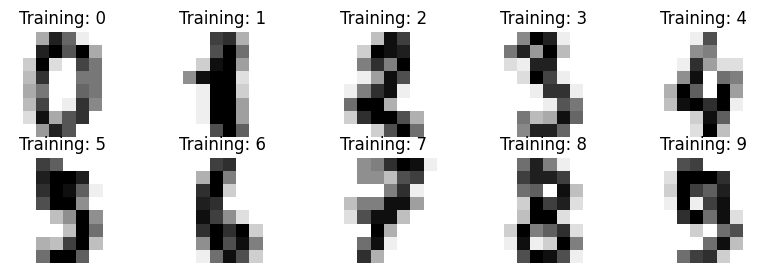

In [22]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows = 2, ncols = 5, figsize=(10,3))

for ax, image, label in zip(axes.flat, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f'Training: {label}')

# Split Data

In [35]:
x_train, x_test, y_train, y_test = train_test_split(
    digits.data,
    digits.target,
    test_size=0.2,
    random_state=0
)

# Training model

In [39]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

/home/dionicio/anaconda3/envs/platzi/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Testing Model

In [40]:
predictions = logistic_reg.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)

In [42]:
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

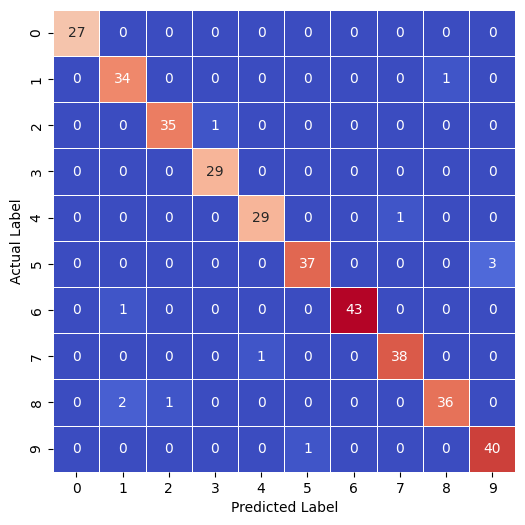

In [51]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm,
            annot=True,
            linewidths=.5,
            square=True,
            cmap='coolwarm',
            ax=ax,
            cbar=False
            )
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
plt.show()